<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Log%C3%ADstica%20II/ModeloTransporte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from google.colab import files 
#uploaded = files.upload()

In [ ]:
#data = pd.read_excel('/content/drive/My Drive/datos_transporte.xls')
#df = pd.DataFrame(data)
#df

In [ ]:
i=0.3
ss = 19178
c= 30
D = 700000

Esta es una estructura de datos llamada diccionario: Usa claves y datos

In [ ]:
data = {'Modo': ['Ferroviario', 'Fluvial', 'Carretera', 'Aéreo'], 'tau':[0.0575, 0.0384, 0.0137, 0.0055], 'r':[0.1,0.15,0.2,1.4], 'N':[10,20,20,40],'cap':[1000000, 17500, 8750, 17500], 'A':[2000,5000,1500,1000]}

DataFrame es una estructura de Pandas. Es una tabla indexada

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Modo,tau,r,N,cap,A
0,Ferroviario,0.0575,0.10,10,1000000,2000
1,Fluvial,0.0384,0.15,20,17500,5000
2,Carretera,0.0137,0.20,20,8750,1500
3,Aéreo,0.0055,1.40,40,17500,1000


Un dataframe es como una matriz. Pero en lugar de decir df[0][3], decimos df.at[0, 'tau'] o df.loc[0, 'tau']

In [ ]:
print(df.at[0,'tau'])

0.0575


In [ ]:
print(df.loc[0,'tau'])

0.0575


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Modo    4 non-null      object 
 1   tau     4 non-null      float64
 2   r       4 non-null      float64
 3   N       4 non-null      int64  
 4   cap     4 non-null      int64  
 5   A       4 non-null      int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 320.0+ bytes


In [ ]:
df.describe()

,tau,r,N,cap,A
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.028775,0.462500,22.500000,260937.500000,2375.000000
std,0.023712,0.626332,12.583057,492725.598711,1796.988221
min,0.005500,0.100000,10.000000,8750.000000,1000.000000
25%,0.011650,0.137500,17.500000,15312.500000,1375.000000
50%,0.026050,0.175000,20.000000,17500.000000,1750.000000
75%,0.043175,0.500000,25.000000,263125.000000,2750.000000
max,0.057500,1.400000,40.000000,1000000.000000,5000.000000


Añadamos la columna Q con Q = D/N


In [ ]:
df['Q']=D/df['N']

In [ ]:
df

,Modo,tau,r,N,cap,A,Q
0,Ferroviario,0.0575,0.10,10,1000000,2000,70000.0
1,Fluvial,0.0384,0.15,20,17500,5000,35000.0
2,Carretera,0.0137,0.20,20,8750,1500,35000.0
3,Aéreo,0.0055,1.40,40,17500,1000,17500.0


Cambiemos el índice de la tabla. Ahora el índice debe ser 'Modo'

In [ ]:
df.set_index('Modo', inplace=True)

In [ ]:
df

,tau,r,N,cap,A,Q
Modo,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0
Carretera,0.0137,0.20,20,8750,1500,35000.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0


Tomemos el modo de transporte 'Ferroviario'. df.loc['Ferroviario] toma todas las columnas de la fila 'Ferroviario'

In [ ]:
print( df.loc['Ferroviario','Q'])

70000.0


'slicing' = tomar trozos del dataframe. df_m es un nuevo dataframe

In [ ]:
df_m = df.loc['Aéreo']

In [ ]:
df_m

tau        0.0055
r          1.4000
N         40.0000
cap    17500.0000
A       1000.0000
Q      17500.0000
Name: Aéreo, dtype: float64

Asignemos los valores de la tabla a variables simples. Modo aéreo

In [ ]:
Q = df_m.loc['Q']
tau = df_m.loc['tau']
cap = df_m.loc['cap']
A = df_m.loc['A']
N = df_m.loc['N']
r = df_m.loc['r']

Hallemos el número de camiones. Usemos la función  ceil que redondea hacia arriba:

In [ ]:
n = math.ceil(Q/cap)
print ('Número de vehículos por envío', n)


Número de vehículos por envío 1


In [ ]:
cprima = c+ r + A*n/Q
costo_inv_planta = i*c*(Q/2+ss)
costo_inv_cd = i*cprima*(Q/2+ss)
costo_inv_transito =  i*c*D*tau
costo_transporte = r*D
costo_total= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*D/Q + i*cprima*(Q/2+ss)

In [ ]:
print('c_prima', cprima)
print('Costo inv planta', costo_inv_planta)
print('Costo inv cd',costo_inv_cd)
print('Costo inv tránsito', costo_inv_transito)
print('Costo transporte', costo_transporte)
print('Costo total anual',costo_total)

c_prima 31.457142857142856
Costo inv planta 251352.0
Costo inv cd 263560.5257142857
Costo inv tránsito 34650.0
Costo transporte 979999.9999999999
Costo total anual 1569562.5257142857


Ahora todo en unas pocas instrucciones

In [ ]:
df

,tau,r,N,cap,A,Q
Modo,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0
Carretera,0.0137,0.20,20,8750,1500,35000.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0


Ejercicio: Crear las otras columnas (una para cada costo y una para el costo total anual)

Primero calculemos el número de vehículos por envío para cada modo


Creemos una columna para 'n', el número de vehículos

In [ ]:
df['n']=df['Q']/df['cap']


In [ ]:
df

,tau,r,N,cap,A,Q,n
Modo,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,0.07
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.00
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.00
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.00


In [ ]:
df.loc['Ferroviario','n']=1

Corrijamos manualmente 'n' del ferroviario

In [ ]:
df.at['Ferroviario','n']=1
df

,tau,r,N,cap,A,Q,n
Modo,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0


No es muy elegante. Sería mejor aplicar una función de una vez. Para eso necesitamos una librería que nos permita hacer todos los cálculos elemento por elemento. Es numpy

In [ ]:
import numpy as np


La función ceil redondea hacia arriba. Si lo hacemos con math.ceil nos arroja un error

In [ ]:
df['n']= np.ceil(df['Q']/df['cap'])
df

,tau,r,N,cap,A,Q,n
Modo,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0


Devolver el tamaño de lote más grande

In [ ]:
Qmax = np.max(df['Q'])
Qmax

70000.0

In [ ]:
pos = np.argmax(df['Q'])
pos

0

In [ ]:
df['c_prima'] = c + df['r']+ df['A']*df['n']/df['Q']
df

,tau,r,N,cap,A,Q,n,c_prima
Modo,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143


In [ ]:
df['costo_inv_planta'] = i*c*(df['Q']/2+ss)
df

,tau,r,N,cap,A,Q,n,c_prima,costo_inv_planta
Modo,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0


Ejercicio: Crear las otras columnas (una para cada costo y una para el costo total anual)

In [ ]:
df['costo_inv_tránsito']= i*c*D*df['tau']
df

,tau,r,N,cap,A,Q,n,c_prima,costo_inv_planta,costo_inv_tránsito
Modo,,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0,362250.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0,241920.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0,86310.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0,34650.0


In [ ]:
df['costo_inv_cd']= i*df['c_prima']*(df['Q']/2+ss)
df

,tau,r,N,cap,A,Q,n,c_prima,costo_inv_planta,costo_inv_tránsito,costo_inv_cd
Modo,,,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0,362250.0,489691.722857
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0,241920.0,334896.338571
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0,86310.0,334188.977143
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0,34650.0,263560.525714


In [ ]:
df['costo_transporte']= (df['r']+ df['A']*df['n']/df['Q'])*D
df

,tau,r,N,cap,A,Q,n,c_prima,costo_inv_planta,costo_inv_tránsito,costo_inv_cd,costo_transporte
Modo,,,,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0,362250.0,489691.722857,90000.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0,241920.0,334896.338571,305000.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0,86310.0,334188.977143,260000.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0,34650.0,263560.525714,1020000.0


In [ ]:
df['costo_total']= df['costo_inv_planta']+df['costo_inv_tránsito']+df['costo_inv_cd']+df['costo_transporte']

In [ ]:
df['costo_total']

Modo
Ferroviario    1.429544e+06
Fluvial        1.211918e+06
Carretera      1.010601e+06
Aéreo          1.569563e+06
Name: costo_total, dtype: float64

Ahora el óptimo

In [ ]:
df_m = df.loc['Fluvial',['tau','r','A','cap']]
tau = df_m.loc['tau']
cap = df_m.loc['cap']
A = df_m.loc['A']
r = df_m.loc['r']
i=0.3
ss = 19178
c= 30
D = 700000
df_m






tau        0.0384
r          0.1500
A       5000.0000
cap    17500.0000
Name: Fluvial, dtype: float64

In [ ]:
def calc_costoTotal(tau, cap, A, r, i, c, D, ss, N):
  Q = D/N #tamaño de lote

  n = math.ceil(Q/cap) #redondea hacia arriba el # de vehículos

  cprima = c+ r + A*n/Q

  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  costo_total= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*D/Q + i*cprima*(Q/2+ss) 
  return costo_total #devuelve el costo total anual

In [ ]:
 num_val=101
costo_array= np.zeros(num_val) # crear un arreglo de ceros con 101 posiciones
n_array = np.zeros(num_val) #arreglo de frecuencias
q_array = np.zeros(num_val) # arreglo tamaño de lote

for k in range(0,num_val):
  n_array[k] = k+1
  q_array[k] = D/(k+1)
  costo_array[k]= calc_costoTotal(tau, cap, A, r, i, c, D, ss, k+1)


In [ ]:
np.min(costo_array) # costo mínimo

1053274.5885714286

In [ ]:
pos =np.argmin(costo_array) #posición del costo mínimo

In [ ]:
Q_opt = q_array[pos]
Q_opt

17500.0

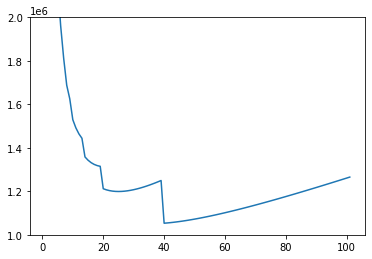

In [ ]:
import matplotlib.pyplot as plt
plt.ylim((1000000,2000000))
plt.plot(n_array,costo_array)

Ahora con la derivada:
$Q*=\sqrt{\frac{2An(D+i \times ss_{cd})}{i(2c+r)}}$

Definición: Punto de quiebre = $Q_n = n \times cap$ <br>
Procedimiento
Tomar $n$ = 1 <br>

Mientras que no haya factibilidad <br>

> Calcular $Q*$ con la fórmula. <br>



  

> a. Si $Q*$ es factible:<br>



>> Calcular los costos para $Q*$ y
  para los puntos de quiebre $Q_{n-1}, Q_{n-2}... $ <br>


  
> b. Si no, $n= n+1$ <br>

Devolver el costo más barato


In [ ]:
df_m = df.loc['Fluvial',['tau','r','A','cap']]
tau = df_m.loc['tau']
cap = df_m.loc['cap']
A = df_m.loc['A']
r = df_m.loc['r']
i=0.3
ss = 19178
c= 30
D = 700000
df_m

tau        0.0384
r          0.1500
A       5000.0000
cap    17500.0000
Name: Fluvial, dtype: float64

In [ ]:
n= 1
Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
print ('Q*= ', Q)

Q*=  19776.436827402747


¿Es factible?

In [ ]:
n= 2
Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
print (Q)

27968.10517672771


¿Es factible?

Calcular <br>
Costo en punto de quiebre 1. $n= 1$ y $Q_1$ = 17500 <br>
Costo en $Q*$ y $n=2$

Primer calculemos el número de envíos ($N$):
con $n=1$ 

In [ ]:
n=1 #número de vehículos
Q1= n*cap
N= D/(n*cap) #número de envíos
print ('Número de envíos', N)
costo1 = calc_costoTotal(tau, cap, A, r, i, c, D, ss, N)
print ('Tamaño de lote', Q1,' Costo total', costo1)

Número de envíos 40.0
Tamaño de lote 17500.0  Costo total 1053274.5885714286


Con $Q$ = 27968.11

In [ ]:
n=2
Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
N = D/Q
print(N)

25.028509996539587


In [ ]:
N=25 #redondeando
Q = D/N
print ('Número de envíos', N)
costo2 = calc_costoTotal(tau, cap, A, r, i, c, D, ss, N)
print ('Tamaño de lote', Q,' Costo total', costo2)

Número de envíos 25
Tamaño de lote 28000.0  Costo total 1199171.7957142857


In [ ]:
data2 = pd.DataFrame({'Opciones': ['Naviera', 'Aerolinea 1', 'Aerolinea 2'], 'tau':[3, 0.5, 0.4], 'cap':[800, 200, 300], 'A':[2500,9500,12500]})
data2.set_index('Opciones', inplace=True)
data2

,tau,cap,A
Opciones,,,
Naviera,3.0,800,2500
Aerolinea 1,0.5,200,9500
Aerolinea 2,0.4,300,12500


In [ ]:
SSPlanta=450
i=0.2
c=383
Dsemanal=90
DesvEstandarSemanal=15
Alpha=0.95

In [ ]:
Danual=Dsemanal*52
data2['tauAnual']=data2['tau']/52
data2

,tau,cap,A,tauAnual
Opciones,,,,
Naviera,3.0,800,2500,0.057692
Aerolinea 1,0.5,200,9500,0.009615
Aerolinea 2,0.4,300,12500,0.007692


In [ ]:
print('Demanda anual de:',Danual)
for k in data2.index:
  QOptimo=''
  nOptimo=''
  CostoOptimo=''
  for Q in range(1,10001):
    N = Danual/Q
    n = math.ceil(Q/data2['cap'].loc[k]) #redondea hacia arriba el # de vehículos

    T=Q/Danual*52
    cprima = c + data2['A'].loc[k]*n/Q
    SSCD=round(DesvEstandarSemanal*math.sqrt(T+data2['tau'].loc[k])*norm.ppf(Alpha))
    #SSCD2=round(norm.ppf(Alpha,loc=Dsemanal*(T+data2['tau'].loc[k]),scale=math.sqrt(DesvEstandarSemanal**2*(T+data2['tau'].loc[k])))-Dsemanal*(T+data2['tau'].loc[k]))
    costo_inv_planta = i*c*(Q/2+SSPlanta)
    costo_inv_cd = i*cprima*(Q/2+SSCD)
    costo_inv_transito =  i*c*Danual*data2['tauAnual'].loc[k]
    Costo= costo_inv_planta + costo_inv_transito  + costo_inv_cd + data2['A'].loc[k]*n*N
    if CostoOptimo=='':
      CostoOptimo=Costo
      QOptimo=Q
      nOptimo=n
      NOptimo=N
    elif CostoOptimo>Costo:
      CostoOptimo=Costo
      QOptimo=Q
      nOptimo=n
      NOptimo=N

  print('\nResultado para método de transporte',k,'\nCosto Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo,'\nInventario de seguridad anual en el centro de distribución:',SSCD)

Demanda anual de: 4680

Resultado para método de transporte Naviera 
Costo Optimo= 120429.86475195823 
Con Q optimo= 383 
Con n Optimo= 1 
Con N Optimo= 12.219321148825065 
Inventario de seguridad anual en el centro de distribución: 264

Resultado para método de transporte Aerolinea 1 
Costo Optimo= 280017.1 
Con Q optimo= 200 
Con n Optimo= 1 
Con N Optimo= 23.4 
Inventario de seguridad anual en el centro de distribución: 261

Resultado para método de transporte Aerolinea 2 
Costo Optimo= 260534.40000000002 
Con Q optimo= 300 
Con n Optimo= 1 
Con N Optimo= 15.6 
Inventario de seguridad anual en el centro de distribución: 261


In [ ]:
data3 = pd.DataFrame({'Opciones': ['Naviera Sea Mariners', 'Naviera Ocean Plus', 'Naviera Trading World'], 'tau':[3, 4, 5], 'cap':[800, 800, 800] , 'Contenedores disponibles por envío':[4, 1, 2] , 'Costo por contenedor transportado':[2500, 2000, 1500], 'Costo fijo de pedido':[600,800,1000]})
data3.set_index('Opciones', inplace=True)
data3

,tau,cap,Contenedores disponibles por envío,Costo por contenedor transportado,Costo fijo de pedido
Opciones,,,,,
Naviera Sea Mariners,3,800,4,2500,600
Naviera Ocean Plus,4,800,1,2000,800
Naviera Trading World,5,800,2,1500,1000


In [ ]:
data3['A']=data3['Costo fijo de pedido']+data3['Costo por contenedor transportado']
data3

,tau,cap,Contenedores disponibles por envío,Costo por contenedor transportado,Costo fijo de pedido,A
Opciones,,,,,,
Naviera Sea Mariners,3,800,4,2500,600,3100
Naviera Ocean Plus,4,800,1,2000,800,2800
Naviera Trading World,5,800,2,1500,1000,2500


In [ ]:
SSPlanta=365
i=0.2
c=383
Dsemanal=90
DesvEstandarSemanal=15
Alpha=0.89
Danual=Dsemanal*52
data3['tauAnual']=data3['tau']/52
data3

,tau,cap,Contenedores disponibles por envío,Costo por contenedor transportado,Costo fijo de pedido,A,tauAnual
Opciones,,,,,,,
Naviera Sea Mariners,3,800,4,2500,600,3100,0.057692
Naviera Ocean Plus,4,800,1,2000,800,2800,0.076923
Naviera Trading World,5,800,2,1500,1000,2500,0.096154


In [ ]:
print('Demanda anual de:',Danual)
for k in data3.index:
  QOptimo=''
  nOptimo=''
  CostoOptimo=''
  for Q in range(1,10001):
    N = Danual/Q
    n = math.ceil(Q/data3['cap'].loc[k]) #redondea hacia arriba el # de vehículos

    if n>data3['Contenedores disponibles por envío'].loc[k]:
      n=data3['Contenedores disponibles por envío'].loc[k]
      Q=n*data3['cap'].loc[k]
      N = Danual/Q

    T=Q/Danual*52
    cprima = c + data3['Costo por contenedor transportado'].loc[k]*n/Q+ data3['Costo fijo de pedido'].loc[k]/Q
    SSCD=round(DesvEstandarSemanal*math.sqrt(T+data3['tau'].loc[k])*norm.ppf(Alpha))
    #SSCD2=round(norm.ppf(Alpha,loc=Dsemanal*(T+data2['tau'].loc[k]),scale=math.sqrt(DesvEstandarSemanal**2*(T+data2['tau'].loc[k])))-Dsemanal*(T+data2['tau'].loc[k]))
    costo_inv_planta = i*c*(Q/2+SSPlanta)
    costo_inv_cd = i*cprima*(Q/2+SSCD)
    costo_inv_transito =  i*c*Danual*data3['tauAnual'].loc[k]
    Costo= costo_inv_planta + costo_inv_transito  + costo_inv_cd + data3['Costo por contenedor transportado'].loc[k]*n*N+data3['Costo fijo de pedido'].loc[k]*N
    if CostoOptimo=='':
      CostoOptimo=Costo
      QOptimo=Q
      nOptimo=n
      NOptimo=N
    elif CostoOptimo>Costo:
      CostoOptimo=Costo
      QOptimo=Q
      nOptimo=n
      NOptimo=N

  print('\nResultado para método de transporte',k,'\nCosto Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo,'\nInventario de seguridad anual en el centro de distribución:',SSCD)

Demanda anual de: 4680

Resultado para método de transporte Naviera Sea Mariners 
Costo Optimo= 119603.01379310346 
Con Q optimo= 435 
Con n Optimo= 1 
Con N Optimo= 10.758620689655173 
Inventario de seguridad anual en el centro de distribución: 114

Resultado para método de transporte Naviera Ocean Plus 
Costo Optimo= 123343.71920199503 
Con Q optimo= 401 
Con n Optimo= 1 
Con N Optimo= 11.670822942643392 
Inventario de seguridad anual en el centro de distribución: 66

Resultado para método de transporte Naviera Trading World 
Costo Optimo= 126914.08491048595 
Con Q optimo= 391 
Con n Optimo= 1 
Con N Optimo= 11.969309462915602 
Inventario de seguridad anual en el centro de distribución: 88


In [ ]:
print('Demanda anual de:',Danual)
for k in data3.index:
  QOptimo=''
  nOptimo=''
  CostoOptimo=''
  Q=data3['cap'].loc[k]*data3['Contenedores disponibles por envío'].loc[k]
  N = Danual/Q
  n = math.ceil(Q/data3['cap'].loc[k]) #redondea hacia arriba el # de vehículos

  T=Q/Danual*52
  cprima = c + data3['Costo por contenedor transportado'].loc[k]*n/Q+ data3['Costo fijo de pedido'].loc[k]/Q
  SSCD=round(DesvEstandarSemanal*math.sqrt(T+data3['tau'].loc[k])*norm.ppf(Alpha))
  #SSCD2=round(norm.ppf(Alpha,loc=Dsemanal*(T+data3['tau'].loc[k]),scale=math.sqrt(DesvEstandarSemanal**2*(T+data3['tau'].loc[k])))-Dsemanal*(T+data3['tau'].loc[k]))
  costo_inv_planta = i*c*(Q/2+SSPlanta)
  costo_inv_cd = i*cprima*(Q/2+SSCD)
  costo_inv_transito =  i*c*Danual*data3['tauAnual'].loc[k]
  Costo= costo_inv_planta + costo_inv_transito  + costo_inv_cd + data3['Costo por contenedor transportado'].loc[k]*n*N+data3['Costo fijo de pedido'].loc[k]*N
  if CostoOptimo=='':
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=N
  elif CostoOptimo>Costo:
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=N
  print('\nResultado para método de transporte',k,'\nCosto Optimo=',CostoOptimo,'\nCosto Inventario planta=',costo_inv_planta,'\nCosto Inventario cd=',costo_inv_cd,'\nCosto Inventario en tránsito=',costo_inv_transito,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo,'\nInventario de seguridad anual en el centro de distribución:',SSCD)

Demanda anual de: 4680

Resultado para método de transporte Naviera Sea Mariners 
Costo Optimo= 319131.42500000005 
Costo Inventario planta= 150519.00000000003 
Costo Inventario cd= 132427.92500000002 
Costo Inventario en tránsito= 20682.000000000004 
Con Q optimo= 3200 
Con n Optimo= 4 
Con N Optimo= 1.4625 
Inventario de seguridad anual en el centro de distribución: 114

Resultado para método de transporte Naviera Ocean Plus 
Costo Optimo= 138576.80000000002 
Costo Inventario planta= 58599.00000000001 
Costo Inventario cd= 36021.8 
Costo Inventario en tránsito= 27576.000000000007 
Con Q optimo= 800 
Con n Optimo= 1 
Con N Optimo= 5.85 
Inventario de seguridad anual en el centro de distribución: 66

Resultado para método de transporte Naviera Trading World 
Costo Optimo= 203873.80000000005 
Costo Inventario planta= 89239.00000000001 
Costo Inventario cd= 68464.8 
Costo Inventario en tránsito= 34470.00000000001 
Con Q optimo= 1600 
Con n Optimo= 2 
Con N Optimo= 2.925 
Inventario de se